# SDS Hackathon
## Dataset: 58
## Name: Nikhil Girish
## SRN: PES2UG21CS334
## Section: F

## Descriptive Statistics

In [110]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("58.csv")
data.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,87.0,99.0,88.0
1,female,group A,some high school,standard,completed,21.0,117.0,102.0
2,male,group C,some high school,standard,none,105.0,115.0,107.0
3,male,group A,some college,standard,none,62.0,84.0,58.0
4,female,group D,some college,standard,none,91.0,105.0,89.0


In [111]:
srs = data.sample(n=100)
srs

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
261,male,group D,some high school,standard,none,94.0,106.0,92.0
944,female,group D,some college,standard,none,73.0,95.0,75.0
887,male,group C,master's degree,free/reduced,none,69.0,99.0,73.0
783,male,group B,some high school,standard,none,67.0,86.0,76.0
602,female,group D,some high school,standard,none,91.0,20.0,94.0
...,...,...,...,...,...,...,...,...
892,male,group D,master's degree,standard,completed,65.0,94.0,87.0
235,female,group E,some high school,standard,none,95.0,102.0,91.0
271,female,group A,some high school,standard,none,73.0,76.0,56.0
83,male,group C,associate's degree,free/reduced,completed,87.0,91.0,77.0


In [112]:
def systematic_sampling(df,step):
    indexes = np.arange(0,len(df),step = step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

sys_sample = systematic_sampling(data,50)
sys_sample

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,87.0,99.0,88.0
50,female,group D,some high school,standard,none,68.0,86.0,62.0
100,female,group D,associate's degree,standard,none,81.0,94.0,81.0
150,female,group B,master's degree,standard,none,77.0,94.0,106.0
200,female,group C,master's degree,free/reduced,none,82.0,30.0,100.0
250,female,group D,associate's degree,standard,none,62.0,76.0,63.0
300,male,group A,some high school,standard,none,96.0,105.0,95.0
350,female,group D,some high school,free/reduced,completed,110.0,92.0,83.0
400,female,group D,some high school,standard,none,74.0,81.0,81.0
450,female,group A,some high school,free/reduced,completed,79.0,112.0,99.0


In [113]:
dataTypeSeries = data.dtypes
print('The data type of each column of data is:')
print(dataTypeSeries)

The data type of each column of data is:
gender                          object
race                            object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


In [114]:
print("Reading Score:            ", int(data["reading score"].mean()))
print("Math Score:               ", int(data["math score"].mean()))
print("Test Preparation Course:  ", data['test preparation course'].mode())

Reading Score:             94
Math Score:                80
Test Preparation Course:   0    none
dtype: object


### Here, we see that the mean value of math score is 94, and the modal value of test preparation course is 'none'.

In [115]:
data.describe()

,math score,reading score,writing score
count,997.000000,997.000000,996.000000
mean,80.225677,94.132397,80.983936
std,16.967670,17.083557,16.762237
min,20.000000,20.000000,24.000000
25%,70.000000,85.000000,71.000000
50%,81.000000,97.000000,82.000000
75%,92.000000,106.000000,92.250000
max,116.000000,120.000000,119.000000


### We can notice a disparity in the number of records for reading score and the other scores. Let us investigate this further by finding total number of records.

In [116]:
print("The total number of records is\n",data.count())

The total number of records is
 gender                         1000
race                           1000
parental level of education     996
lunch                          1000
test preparation course        1000
math score                      997
reading score                   997
writing score                   996
dtype: int64


### Here we see there is a disparity in the number of rows for each column. This indicates that there is missing data for which we will need to do data cleaning in order to make sure the data can be worked with.

### As we are working to find the relation between test preparation score and math score, we cannot have missing values as this will disrupt both our visualisation and our regression analysis

### As the number of records with missing values is very small compared to the total size of our data set, we can simply drop records with missing values

# Data Cleaning

#### As we have a small number of records with missing values, we are opting to drop these records and then proceed with further analysis

In [117]:
data.dropna(inplace=True)
print("After data cleaning:\n")
data.count()

After data cleaning:



gender                         991
race                           991
parental level of education    991
lunch                          991
test preparation course        991
math score                     991
reading score                  991
writing score                  991
dtype: int64

### The data has been successfully cleaned and is now suitable for resgression and other forms of analysis

<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

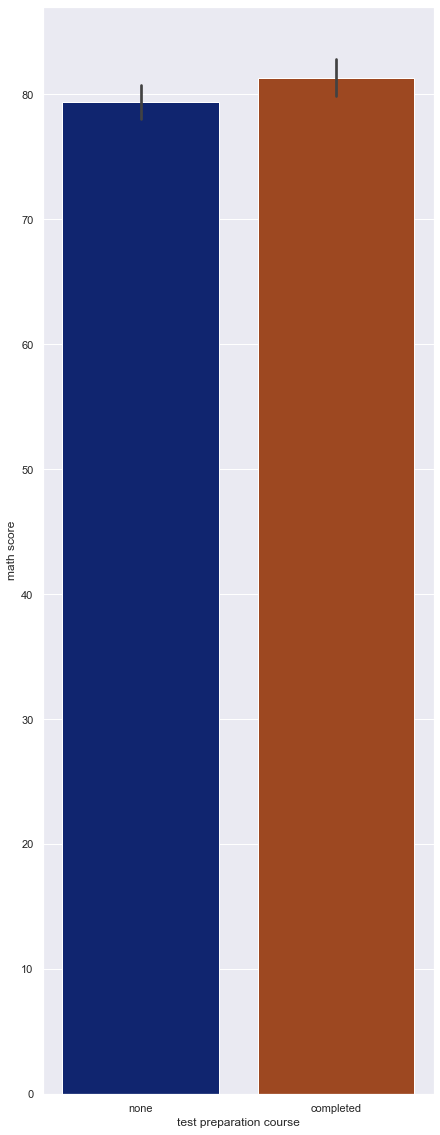

In [118]:
sb.set_palette('dark')
sb.barplot(x = "test preparation course",y="math score", data=data)

### We see that no conclusion can be drawn from this method of visualisation, so we will test alternate methods

<AxesSubplot:>

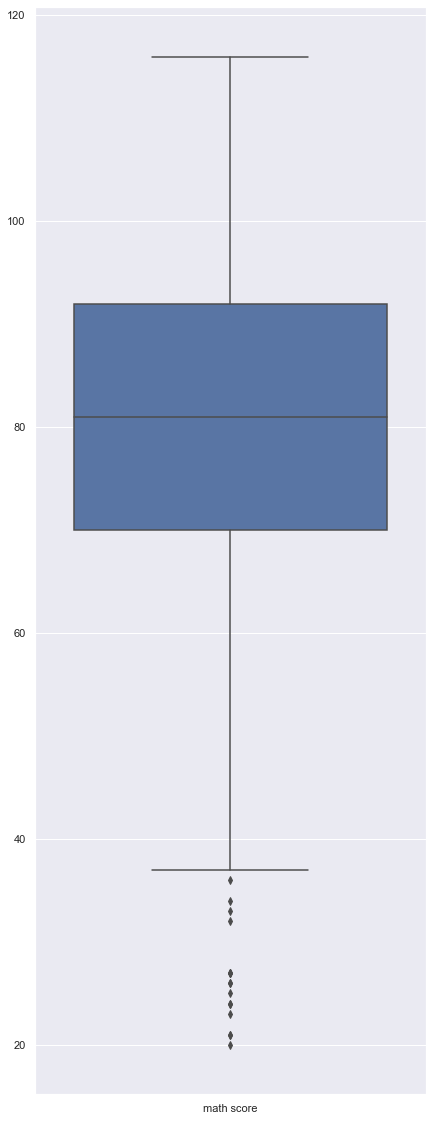

In [119]:
sb.set(rc = {'figure.figsize':(7,20)})
sb.boxplot(data=data[["math score"]])

### Now we have obtained a meaningful visualisation of math score that shows the distribution of values. However we still need to establish a relation between math score and test preparation course

array([[<AxesSubplot:title={'center':'math score'}>]], dtype=object)

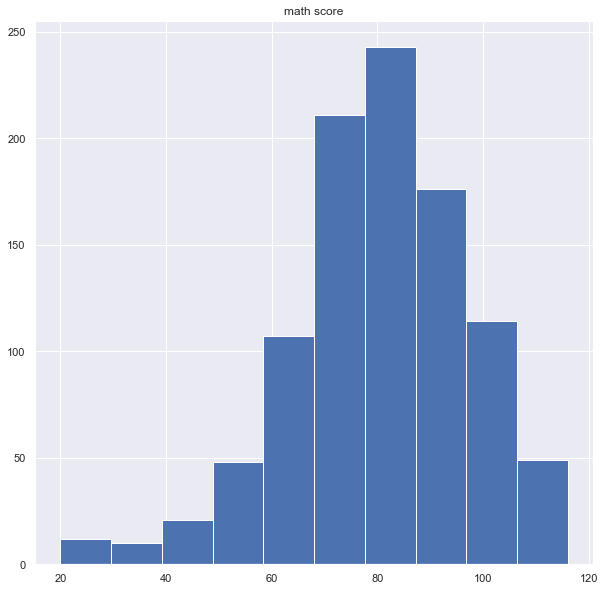

In [120]:
data.hist(column='math score',figsize=(10,10))

### It is evident that we cannot conduct any meaningful analysis of the relation of between test preparation course completion and maths score without replacing the values of test preparation course with dummy values (namely, 0 for none and 1 for completed)

In [121]:
data.replace('none',0,inplace=True)
data.replace('completed',1,inplace=True)
dataTypeSeries = data.dtypes
print('The data type of each column of data is:')
print(dataTypeSeries)

The data type of each column of data is:
gender                          object
race                            object
parental level of education     object
lunch                           object
test preparation course          int64
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


### We see that it is successfully replaced

In [122]:
import math
import scipy
import scipy.stats as st

## Bernoulli Distribution

In [123]:
no_prep = data[data['test preparation course'] == 0]
prep = data[data['test preparation course'] != 0]

totalcount = len(data.index)
noprep_people = len(no_prep.index)
prep = totalcount - noprep_people
noprepprob = noprep_people/totalcount
prepprob = prep/totalcount
print("Probability of a person being not prepared:",noprepprob)
print("Probability of person being prepared:",prepprob)

Probability of a person being not prepared: 0.5822401614530777
Probability of person being prepared: 0.4177598385469223


### We see that the probability of a person not being prepared is higher than being prepared

## Now, we must do hypothesis testing

### We will take α to be 0.05 and as the sample size is very great, we will be doing z test.
### As mentioned in the problem statement we will be comparing performace of people in maths, where a good score is considered to be above mean (80) and a bad score being below mean

In [124]:
nop = data[data["test preparation course"]==0]
prep = data[data["test preparation course"]==1]

zval1 = (80 - nop["math score"].mean()) / (nop["math score"].std() )
zprob1=scipy.stats.norm.cdf(zval1)

zval2 = (80 - prep["math score"].mean()) / (prep["math score"].std() )
zprob2=scipy.stats.norm.cdf(zval2)

print("The probability of the null hypothesis is ",zprob1-zprob2)

The probability of the null hypothesis is  0.046457369343262556


### As the probability is <0.05, we accept the null hypothesis

## Correlation Analysis

array([[<AxesSubplot:xlabel='test preparation course', ylabel='test preparation course'>,
        <AxesSubplot:xlabel='math score', ylabel='test preparation course'>,
        <AxesSubplot:xlabel='reading score', ylabel='test preparation course'>,
        <AxesSubplot:xlabel='writing score', ylabel='test preparation course'>],
       [<AxesSubplot:xlabel='test preparation course', ylabel='math score'>,
        <AxesSubplot:xlabel='math score', ylabel='math score'>,
        <AxesSubplot:xlabel='reading score', ylabel='math score'>,
        <AxesSubplot:xlabel='writing score', ylabel='math score'>],
       [<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>,
        <AxesSubplot:xlabel='math score', ylabel='reading score'>,
        <AxesSubplot:xlabel='reading score', ylabel='reading score'>,
        <AxesSubplot:xlabel='writing score', ylabel='reading score'>],
       [<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>,
        <AxesSubplot:xlabel=

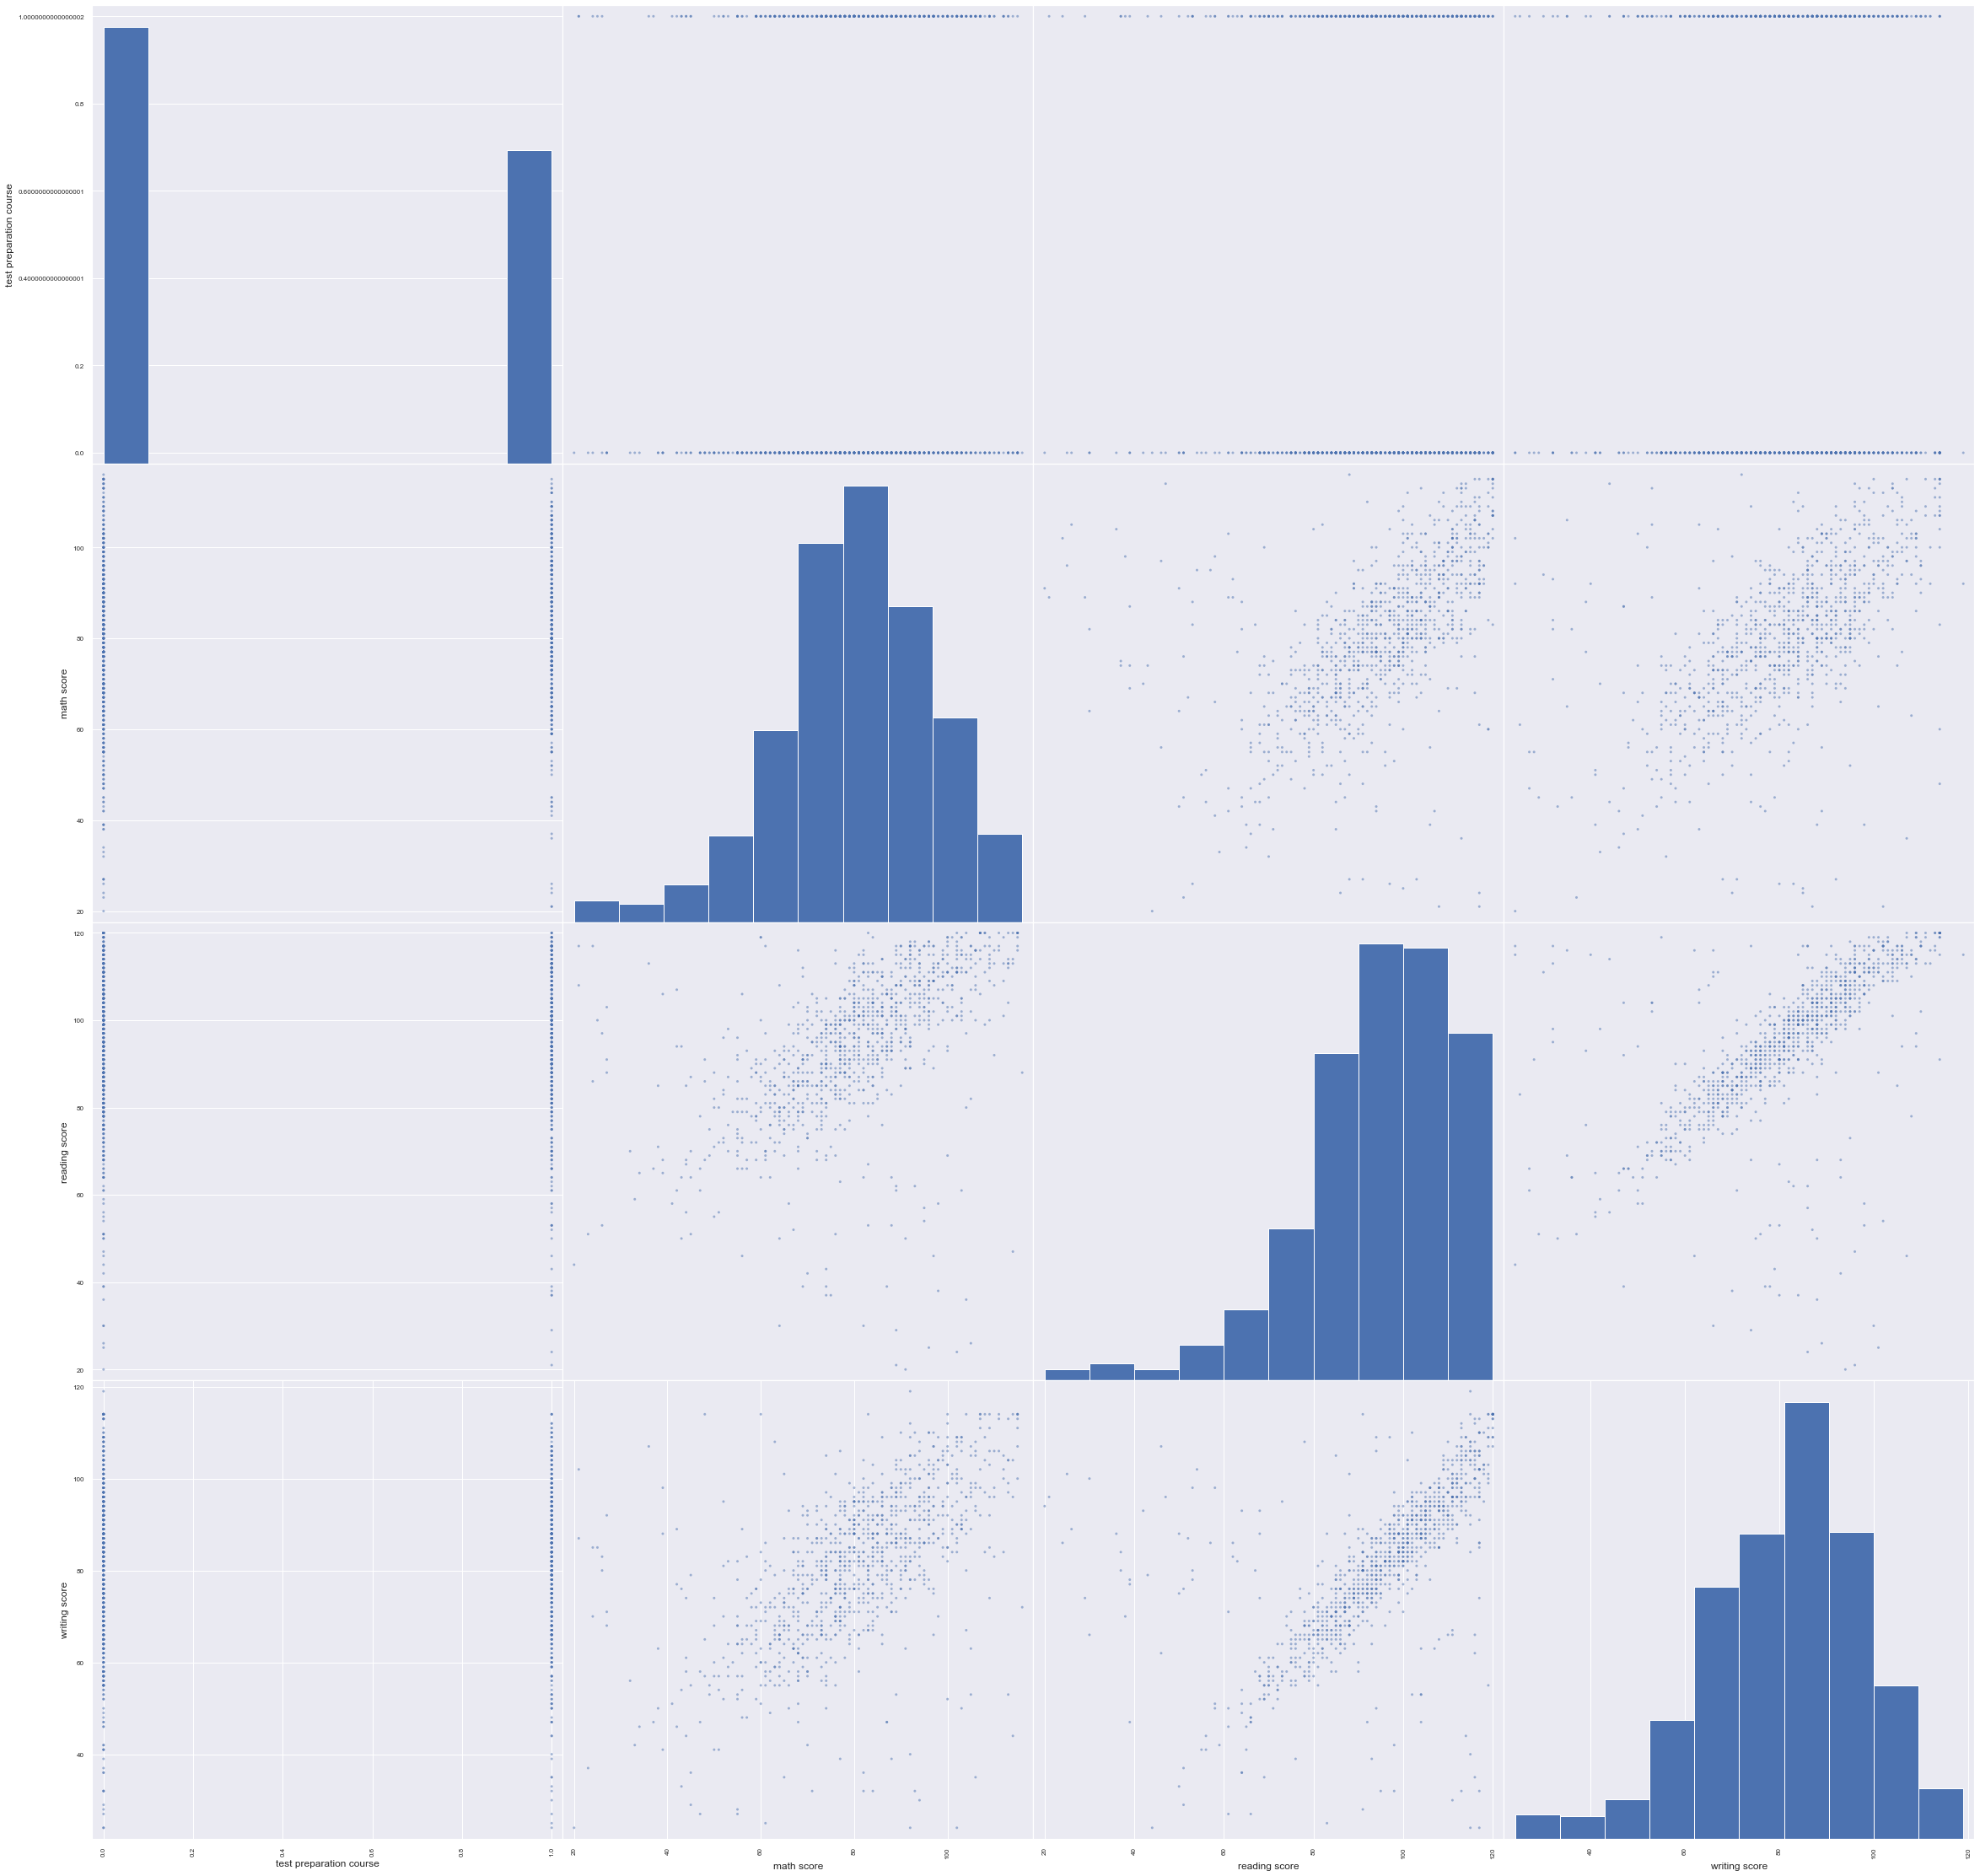

In [125]:
pd.plotting.scatter_matrix(data,figsize=(40,40))

Text(0.5, 1.0, 'Pearson Correlation')

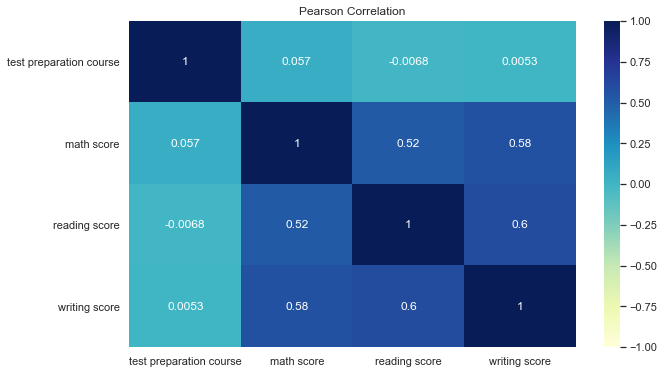

In [126]:
data.corr()
r = data.corr()
plt.figure(figsize=(10,6))
heatmap = sb.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
plt.title("Pearson Correlation")

## Regression Analysis

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [128]:
x, y = data["test preparation course"], data["math score"]
print("Initial shape",x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("Training Data: ",x_train.shape, y_train.shape)
print("Testing Data: ",x_test.shape, y_test.shape)

Initial shape (991,) (991,)
Training Data:  (792,) (792,)
Testing Data:  (199,) (199,)


In [129]:
model = LinearRegression()
model.fit(np.array(x_train).reshape((-1, 1)), y_train)

LinearRegression()

## Judging our model

In [130]:
r_sq = model.score(np.array(x_train).reshape((-1, 1)), y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.002611996072485634
intercept: 79.41176470588235
slope: [1.74439145]


## Performing Testing

In [132]:
yhat = model.predict(np.array(x_test).reshape((-1, 1)))
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_test, yhat)
print('MSE: %.3f' % mse)

MAE: 13.803
MSE: 302.299
